#Problem Statement:
#We haeve to determine by cutting the shell through the cone, staining it, and counting the number of rings through a microscope and after adding 1.5 in to rings it will convert it to year and we have to pridect that.
#This is a reggression issue to pridict the year of abalone.

In [65]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

#Model building lib 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [66]:
#Loading the Dataset:
df=pd.read_csv('abaloneCSV.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [67]:
pd.set_option('display.max_rows',None)

In [68]:
df.shape


(4177, 9)

--There is 4177 rows and 9 columns is availble in the data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#We have total 8 features with datatype float64 and 1 feature has datatype object
#Target with int datatype.

In [7]:
df.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

>>No columns has the null vallue.

In [71]:
#As per the problem statemnet adding +1.5 gives the age in years in the target column rings
df['Rings']=df['Rings'].values + 1.5

In [72]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [73]:
#We use OneHotEncoder encoder method to convert catagorical feature data into numerical:
#df_data=pd.get_dummies(df['Sex'],drop_first=False)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [74]:
df_data=pd.DataFrame(ohe.fit_transform(df[['Sex']]).toarray())

In [75]:
df=df.join(df_data)

In [76]:
df=df.drop(columns='Sex',axis=1)
df.head()
#here we can we see that the columns are converted to binry columns

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,1.0,0.0


In [77]:
#Discribe the dataframe
df.iloc[:,:7].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


#We can see that standerd daviation is looks normal.
#the mean and median(50%) data is also looks balanced for the features

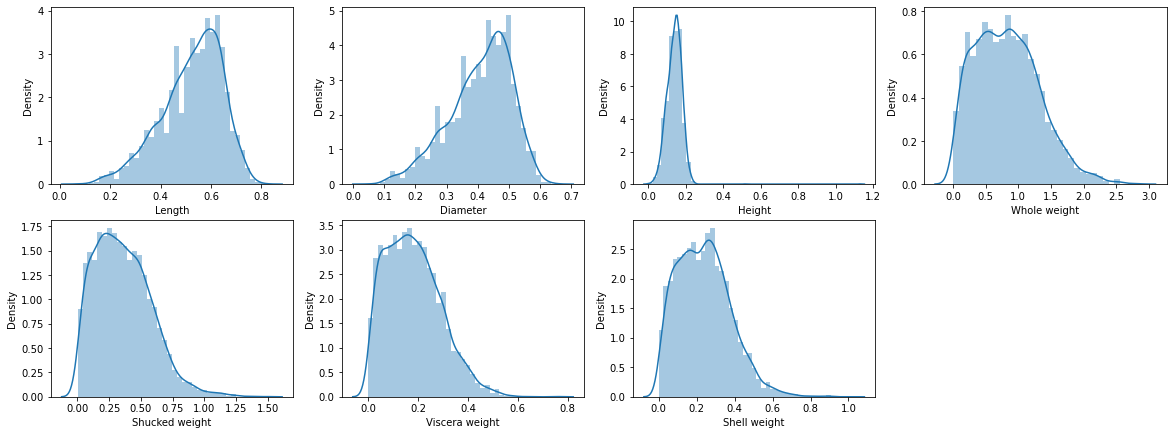

In [80]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,:7]:
    if pltnum <= 30:
        plt.subplot(4,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [81]:
# as we can see the data distribution is not normal there is outliers in many feature
#Height,Whole weight,Shucked weight,Viscera weight,Shell weight having the outliers.

In [82]:
#Now using the quantile method to remove the quantiles in the features.

#q=df['Diameter'].quantile(0.99)
#data_cleaned=df[df['Diameter']<q]

q=df['Height'].quantile(0.97)
data_cleaned=df[df['Height']<q]

q=data_cleaned['Whole weight'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Whole weight']<q]

q=data_cleaned['Shucked weight'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Shucked weight']<q]

q=data_cleaned['Viscera weight'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Viscera weight']<q]

q=data_cleaned['Shell weight'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Shell weight']<q]

In [83]:
#now checking the new shape of the dataframe after deleting the quantiles.
data_cleaned.shape

(3862, 11)

In [84]:
#Data Loss in percentage after deleting the quantiles
loss_percentage=(4177-3906)/4177*100
print(loss_percentage)

6.48790998324156


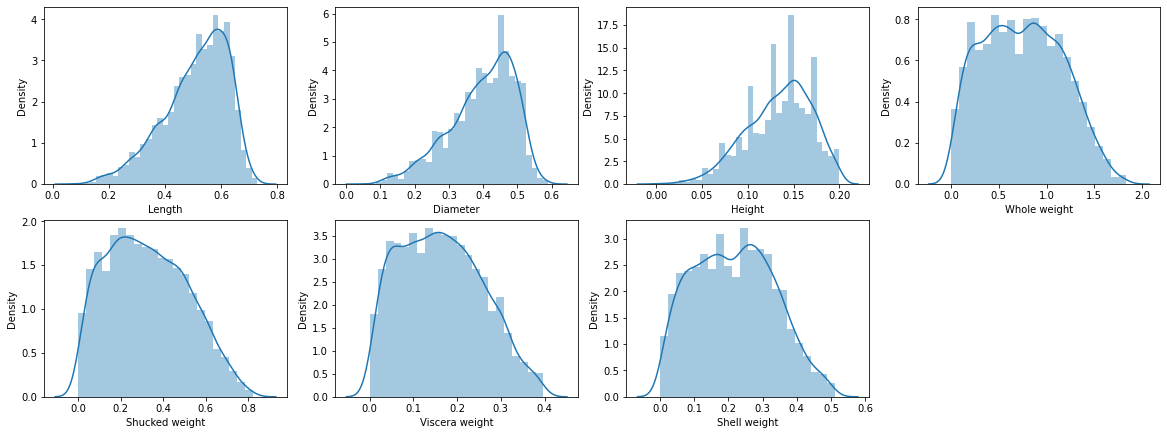

In [21]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in data_cleaned.iloc[:,:7]:
    if pltnum <= 30:
        plt.subplot(4,4,pltnum)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

--after the removing the quantile we can see that there is normal data distribution.

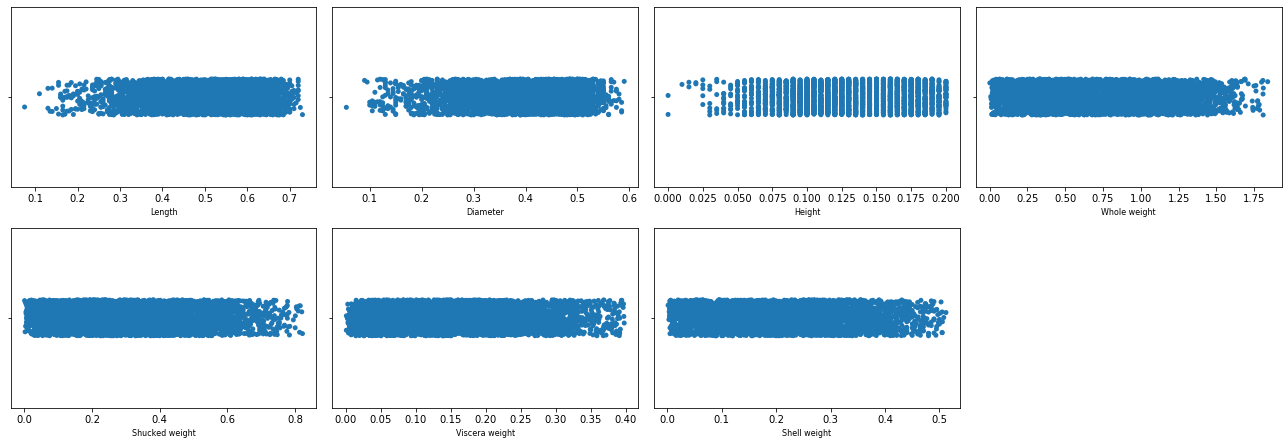

In [86]:
#Now checking the disribution of the data using distribution plot.
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in data_cleaned.iloc[:,:7]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.stripplot(data_cleaned[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

--Data distribution also looks normal after seeing the stripplot.

#I have tested all the method of outlier deletion and then build the model.the quantile method is best with less data loss and max accuracy.
#So after seeing the result i have seleted Quantile deletion is best method to remove outliers.

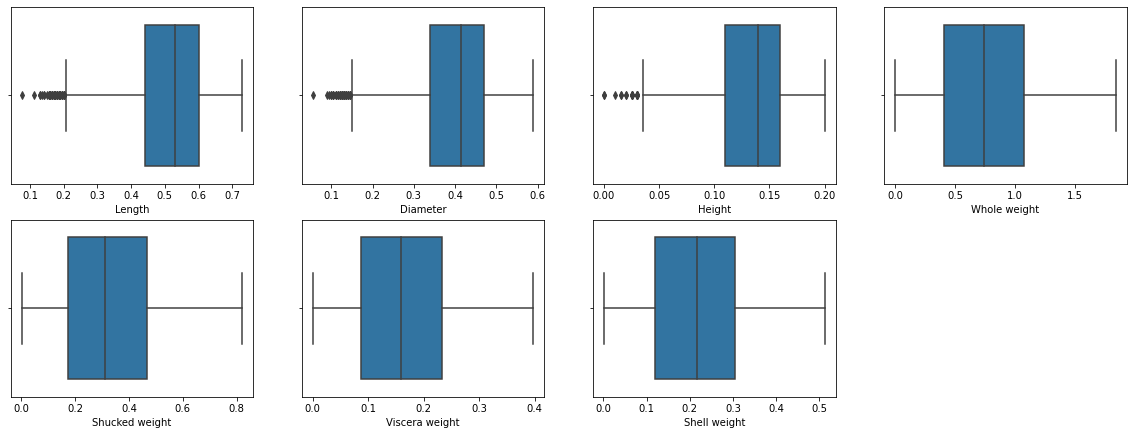

In [87]:
#using box plot to check the outliers in the feature after deleting the quantiles.
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in data_cleaned.iloc[:,:7]:
    if pltnum <= 30:
        plt.subplot(4,4,pltnum)
        sns.boxplot(data_cleaned[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show() 

#we can see some quantiles are still available but it is ok,we can work with that.

In [88]:
#now checking the correlation between features and target.
df_corr=data_cleaned.iloc[:,:8].abs().corr()
df_corr['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.610295
Height            0.594650
Diameter          0.561806
Length            0.544616
Whole weight      0.529879
Viscera weight    0.496592
Shucked weight    0.415261
Name: Rings, dtype: float64

In [89]:
#as we can see there is skewness in the data as all the columns are inbetween -0.5 to +0.5 range.
#so there is need to remove the skewness from the dataframe features.

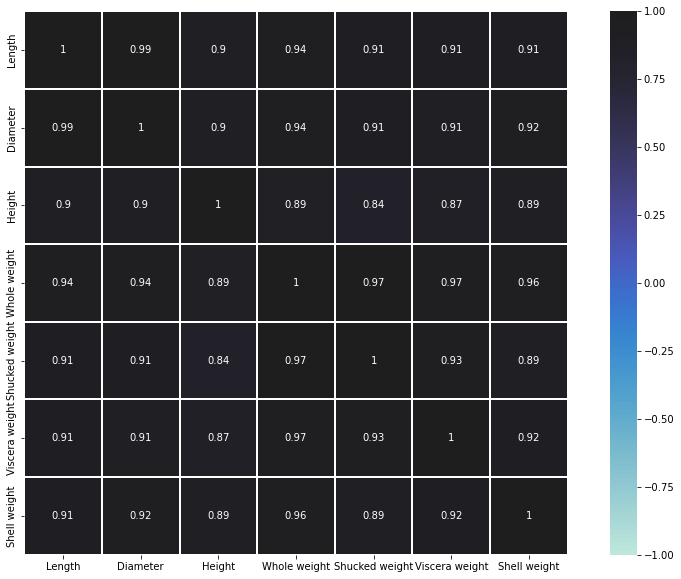

In [90]:
#Checking multicilliniary using heatmap

corr_df=data_cleaned.iloc[:,:7].abs().corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_df,vmin=-1,vmax=1,center=True,square=True,annot=True,fmt='.2g',linewidths=0.1)
plt.show()

#as we can see from heatmap that there is high multicolliniarity between all the features.

In [92]:
#sepeprating the dataframe in x and y to perform the power transfrom and scalar.
x=data_cleaned.drop(columns='Rings',axis=1)
y=data_cleaned['Rings']

x_data=x

In [102]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [103]:
#Applying the standerd scalar on the data
scalar=StandardScaler()
x_new=scalar.fit_transform(x)

In [104]:
#Using VIF to check feature multicolliniarity as we can see the high multicolliniarty between features
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['feature']=x_data.columns

In [105]:
vif.iloc[:7,:]

,vif,feature
0,32.616379,Length
1,31.111631,Diameter
2,6.214476,Height
3,13.673820,Shucked weight
4,13.306976,Viscera weight
5,14.786805,Shell weight
6,2.166612,Rings


In [106]:
#as shown in vif also there is high multicolliniarity issue in all features.

In [107]:
#i have checked the accuracy without deleting any features but it shows very less accuracy.
#Linear reggration : 50%
#Random Forest reggressior : 57%
#KNeighborsRegressor : 53%

#so we are deleting the colunms having the max vif i.e Whole weight

In [108]:
x=data_cleaned.drop(columns=['Whole weight'],axis=1)

In [109]:
x_data=x

In [110]:
#col_names = ['Length', 'Diameter', 'Height','Shucked weight','Viscera weight','Shell weight']
#features = x[col_names]

In [111]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [112]:
scalar=StandardScaler()
x_new=scalar.fit_transform(x)

In [113]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['feature']=x_data.columns

In [114]:
vif.iloc[:6,:]

,vif,feature
0,32.616379,Length
1,31.111631,Diameter
2,6.214476,Height
3,13.673820,Shucked weight
4,13.306976,Viscera weight
5,14.786805,Shell weight


In [115]:
# Now again checking the model accuracy after deleting the Whole weight features with having highest vif.

In [148]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_s=r2_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
    
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)     

Best Accuracy is : 97.00%
The Best Random State is : 10


In [149]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state =120)

In [150]:
#model Evaluation for LR:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_predlr=lr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")

The accuracy of the model using LinearRegression is: 96.16%



In [151]:
#model Evaluation for KNN:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

y_predknn=knn.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")

The accuracy of the model using KNeighborsRegressor is: 96.52%



In [152]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 99.96%



In [153]:
#model Evaluation for AdaBoostRegressor:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

y_predada=ada.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")

The accuracy of the model using AdaBoostRegressor is: 97.02%



In [154]:
#model Evaluation for SVR:
svr=SVR()
svr.fit(x_train,y_train)

y_predsvr=svr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")

The accuracy of the model using SVR is: 98.99%



In [155]:
#now validation the all the models using the cross_val_score
from sklearn.model_selection import cross_val_score

In [156]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_new,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x_new,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x_new,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x_new,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x_new,y,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 99.88%


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 95.63%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 96.41%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: 97.39%


===================Cross Validation Score of SVR========================
Cross validation for the KNN Classifier is: 98.93%




#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:96.16   cross validation score:95.63  Diffrence:0.53
#KNN: Accuracy:96.52   cross validation score:96.41  Diffrence:0.11
#RFR: Accuracy:99.96   cross validation score:99.88  Diffrence:0.08
#ABR: Accuracy:97.02   cross validation score:97.39  Diffrence:0.37
#SVR: Accuracy:98.99   cross validation score:98.93  Diffrence:0.06

#As we can see the Random Forest Regressor has highest accuracy and least differnece so we can select it for hyper parameter tuing.

#now performing the hyper parameter tuning using gridsearchcv

In [125]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [126]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [127]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [128]:
gridcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [131]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=15,min_samples_leaf=2,min_samples_split=2,n_estimators=80)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 100.00%



In [132]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_new,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 99.88%



In [ ]:
#here the differnce is reduce to 0.12 between accuracy and cross validation score after performing hyper parameter tuning.
#so we are saving Random Forest Regressor as our final model.

In [133]:
#Saving the model
import joblib
joblib.dump(rfr,'abalone Model.pkl')

['abalone Model.pkl']

In [134]:
#this will complete our model.